<a href="https://colab.research.google.com/github/Tbharvesh/DeepLearningProject/blob/main/Copy_of_DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# !unzip -q dataset.zip
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train = ImageDataGenerator(rescale=1/255,zoom_range=0.2,shear_range=0.2,horizontal_flip=0.2,vertical_flip=0.2,rotation_range=0.2)
test = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Covid19-dataset/train",
                                          target_size = (224, 224),
                                          batch_size = 10)

test_dataset = test.flow_from_directory("/content/drive/MyDrive/Covid19-dataset/test",
                                          target_size= (224, 224),
                                          batch_size = 10 )


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [28]:
print(train_dataset.class_indices)
print(train_dataset.classes)

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [29]:
import tensorflow as tf
from torch.utils.data import Dataset

# Assuming dataset is your Dataset object
DATASET_SIZE = len(train_dataset)
print(DATASET_SIZE )
VAL_SPLIT = 0.2  # Using 20% of the data for validation

# Calculate the number of examples in the validation set
val_size = int(DATASET_SIZE * VAL_SPLIT)
print(val_size)
# Shuffle the dataset (make sure to use a buffer size large enough for your data)
shuffled_dataset = train_dataset.shuffle(buffer_size=DATASET_SIZE)

# Split the dataset into training and validation sets
val_dataset = shuffled_dataset.take(val_size)
train_dataset = shuffled_dataset.skip(val_size)

# Apply data augmentation only to the training dataset
augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

# No augmentation for validation dataset
# Depending on your setup, you might want to apply non-randomized data preprocessing here as well
val_dataset = val_dataset.map(lambda x, y: (data_augmentation(x, training=False), y))



KeyboardInterrupt: 

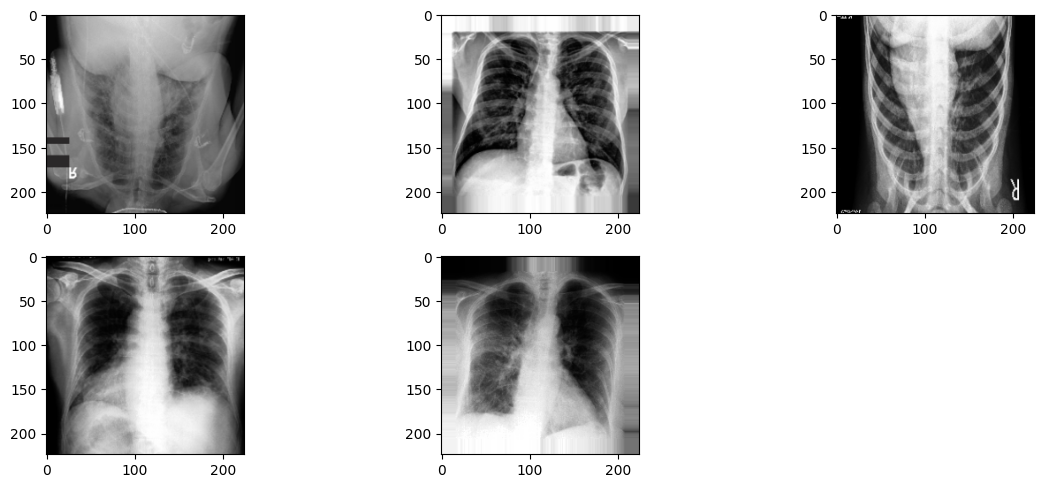

In [30]:
plt.figure(figsize=(12, 12))
for i in range(0, 5):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_dataset:
        image = X_batch[0]  #First img is taken from every batch
        plt.imshow(image)
        # plt.title(str(label.numpy()))
        break
plt.tight_layout()
plt.show()

In [32]:
# plt.figure(figsize=(12, 12))
# for i, (image, label) in enumerate(augmented_train_dataset.take(5)):
#     ax = plt.subplot(5, 3, i + 1)
#     plt.imshow(image.numpy())
#     plt.title(str(label.numpy()))
#     plt.axis("off")
# plt.tight_layout()
# plt.show()

num_train =20
num_validation =20
epochs =100
batch_size= 32

In [31]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, 256, 256)
else:
    input_shape=(256,256,3)

In [33]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Layers of CNN Model


1.   Convolutional
2.   ReLu
3.   Pooling
4.   Dense





In [34]:


model0 =Sequential()
# model0.add(Dense(10,input_shape=(784,),name='dense_layer',activation='softmax'))
model0.add(Conv2D(64,(3,3),input_shape=input_shape))

model0.add(Activation('relu'))
model0.add(MaxPooling2D(pool_size=(2,2)))
model0.add(Conv2D(32,(3,3),activation = 'relu'))
model0.add(MaxPooling2D(pool_size=(2,2)))
model0.add(Conv2D(32,(3,3),activation = 'relu'))
model0.add(Flatten())  #Multidim arr--->1D
model0.add(Dense(64))
# model0.add(Dense(units = 128, activation = 'relu'))
model0.add(Dense(64,activation = 'relu'))
model0.add(Dense(units = 3, activation = 'softmax'))
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9

## Compiling the basic CNN model

In [35]:
model0.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9

## Fit the Model

In [36]:
# augmented_train_dataset_repeated = augmented_train_dataset.repeat()
# val_dataset_repeated = val_dataset.repeat()
training = model0.fit(train_dataset,
                   steps_per_epoch=num_train,epochs=epochs)

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/BiasAdd defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-36-e015a426c231>", line 3, in <cell line: 3>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 252, in call

Matrix size-incompatible: In[0]: [10,86528], In[1]: [115200,64]
	 [[{{node sequential/dense/BiasAdd}}]] [Op:__inference_train_function_1144]

## Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


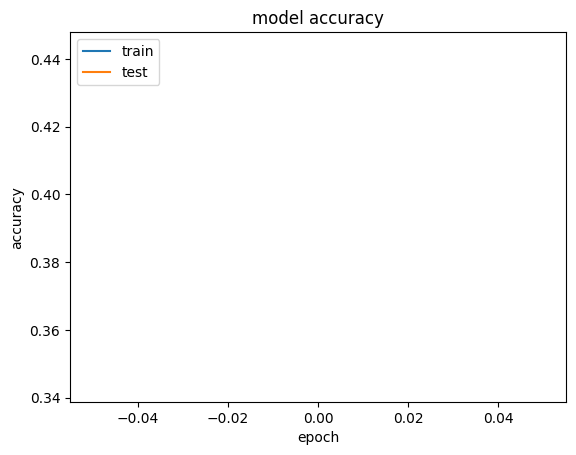

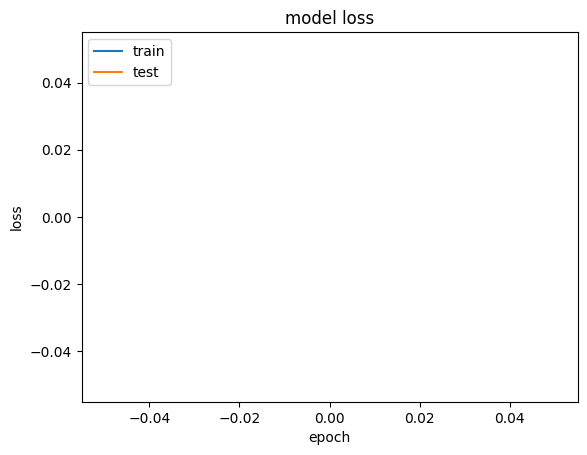

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()